In [1]:
## Determine whether the applicant should be allowed a loan
## Company is selling loans to quality applicants.


In [2]:
## Our aim is to predict the likelihood of e-signing a loan on finanical history

In [3]:
## importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv("datap2p.csv")

In [5]:
###  Entry_id=Applicant id
### Pay_schedule=how often the applicant paid the previous loans
### Home_owner= if 1, applicant owns a house
## Income
## Personal_account_m= how many months the person had personal account
## Personal_account_y= how many years the person had personal account
## risk scores are leveraged from finance and engineering team
## inquiries_last_month= no of enquiries last month
## Esign process=Response Variable

In [6]:
## Exploratory Data Analysis 
data.head()

entry_id  age  pay_schedule  home_owner  income  months_employed  \
0   7629673   40     bi-weekly           1    3135                0   
1   3560428   61        weekly           0    3180                0   
2   6934997   23        weekly           0    1540                6   
3   5682812   40     bi-weekly           0    5230                0   
4   5335819   33  semi-monthly           0    3590                0   

   years_employed  current_address_year  personal_account_m  \
0               3                     3                   6   
1               6                     3                   2   
2               0                     0                   7   
3               6                     1                   2   
4               5                     2                   2   

   personal_account_y    ...     amount_requested  risk_score  risk_score_2  \
0                   2    ...                  550       36200      0.737398   
1                   7    ...                  600       30150      0.738510   
2                   1    ...                  450       34550      0.642993   
3                   7    ...                  700       42150      0.665224   
4                   8    ...                 1100       53850      0.617361   

   risk_score_3  risk_score_4  risk_score_5  ext_quality_score  \
0      0.903517      0.487712      0.515977           0.580918   
1      0.881027      0.713423      0.826402           0.730720   
2      0.766554      0.595018      0.762284           0.531712   
3      0.960832      0.767828      0.778831           0.792552   
4      0.857560      0.613487      0.665523           0.744634   

   ext_quality_score_2  inquiries_last_month  e_signed  
0             0.380918                    10         1  
1             0.630720                     9         0  
2             0.531712                     7         0  
3             0.592552                     8         1  
4             0.744634                    12         0  

[5 rows x 21 columns]

In [10]:
## Cleaning the data
data.isna().any()

## No missing Values

entry_id                False
age                     False
pay_schedule            False
home_owner              False
income                  False
months_employed         False
years_employed          False
current_address_year    False
personal_account_m      False
personal_account_y      False
has_debt                False
amount_requested        False
risk_score              False
risk_score_2            False
risk_score_3            False
risk_score_4            False
risk_score_5            False
ext_quality_score       False
ext_quality_score_2     False
inquiries_last_month    False
e_signed                False
dtype: bool

In [11]:
data1=data.drop(columns=['entry_id','pay_schedule','e_signed'])

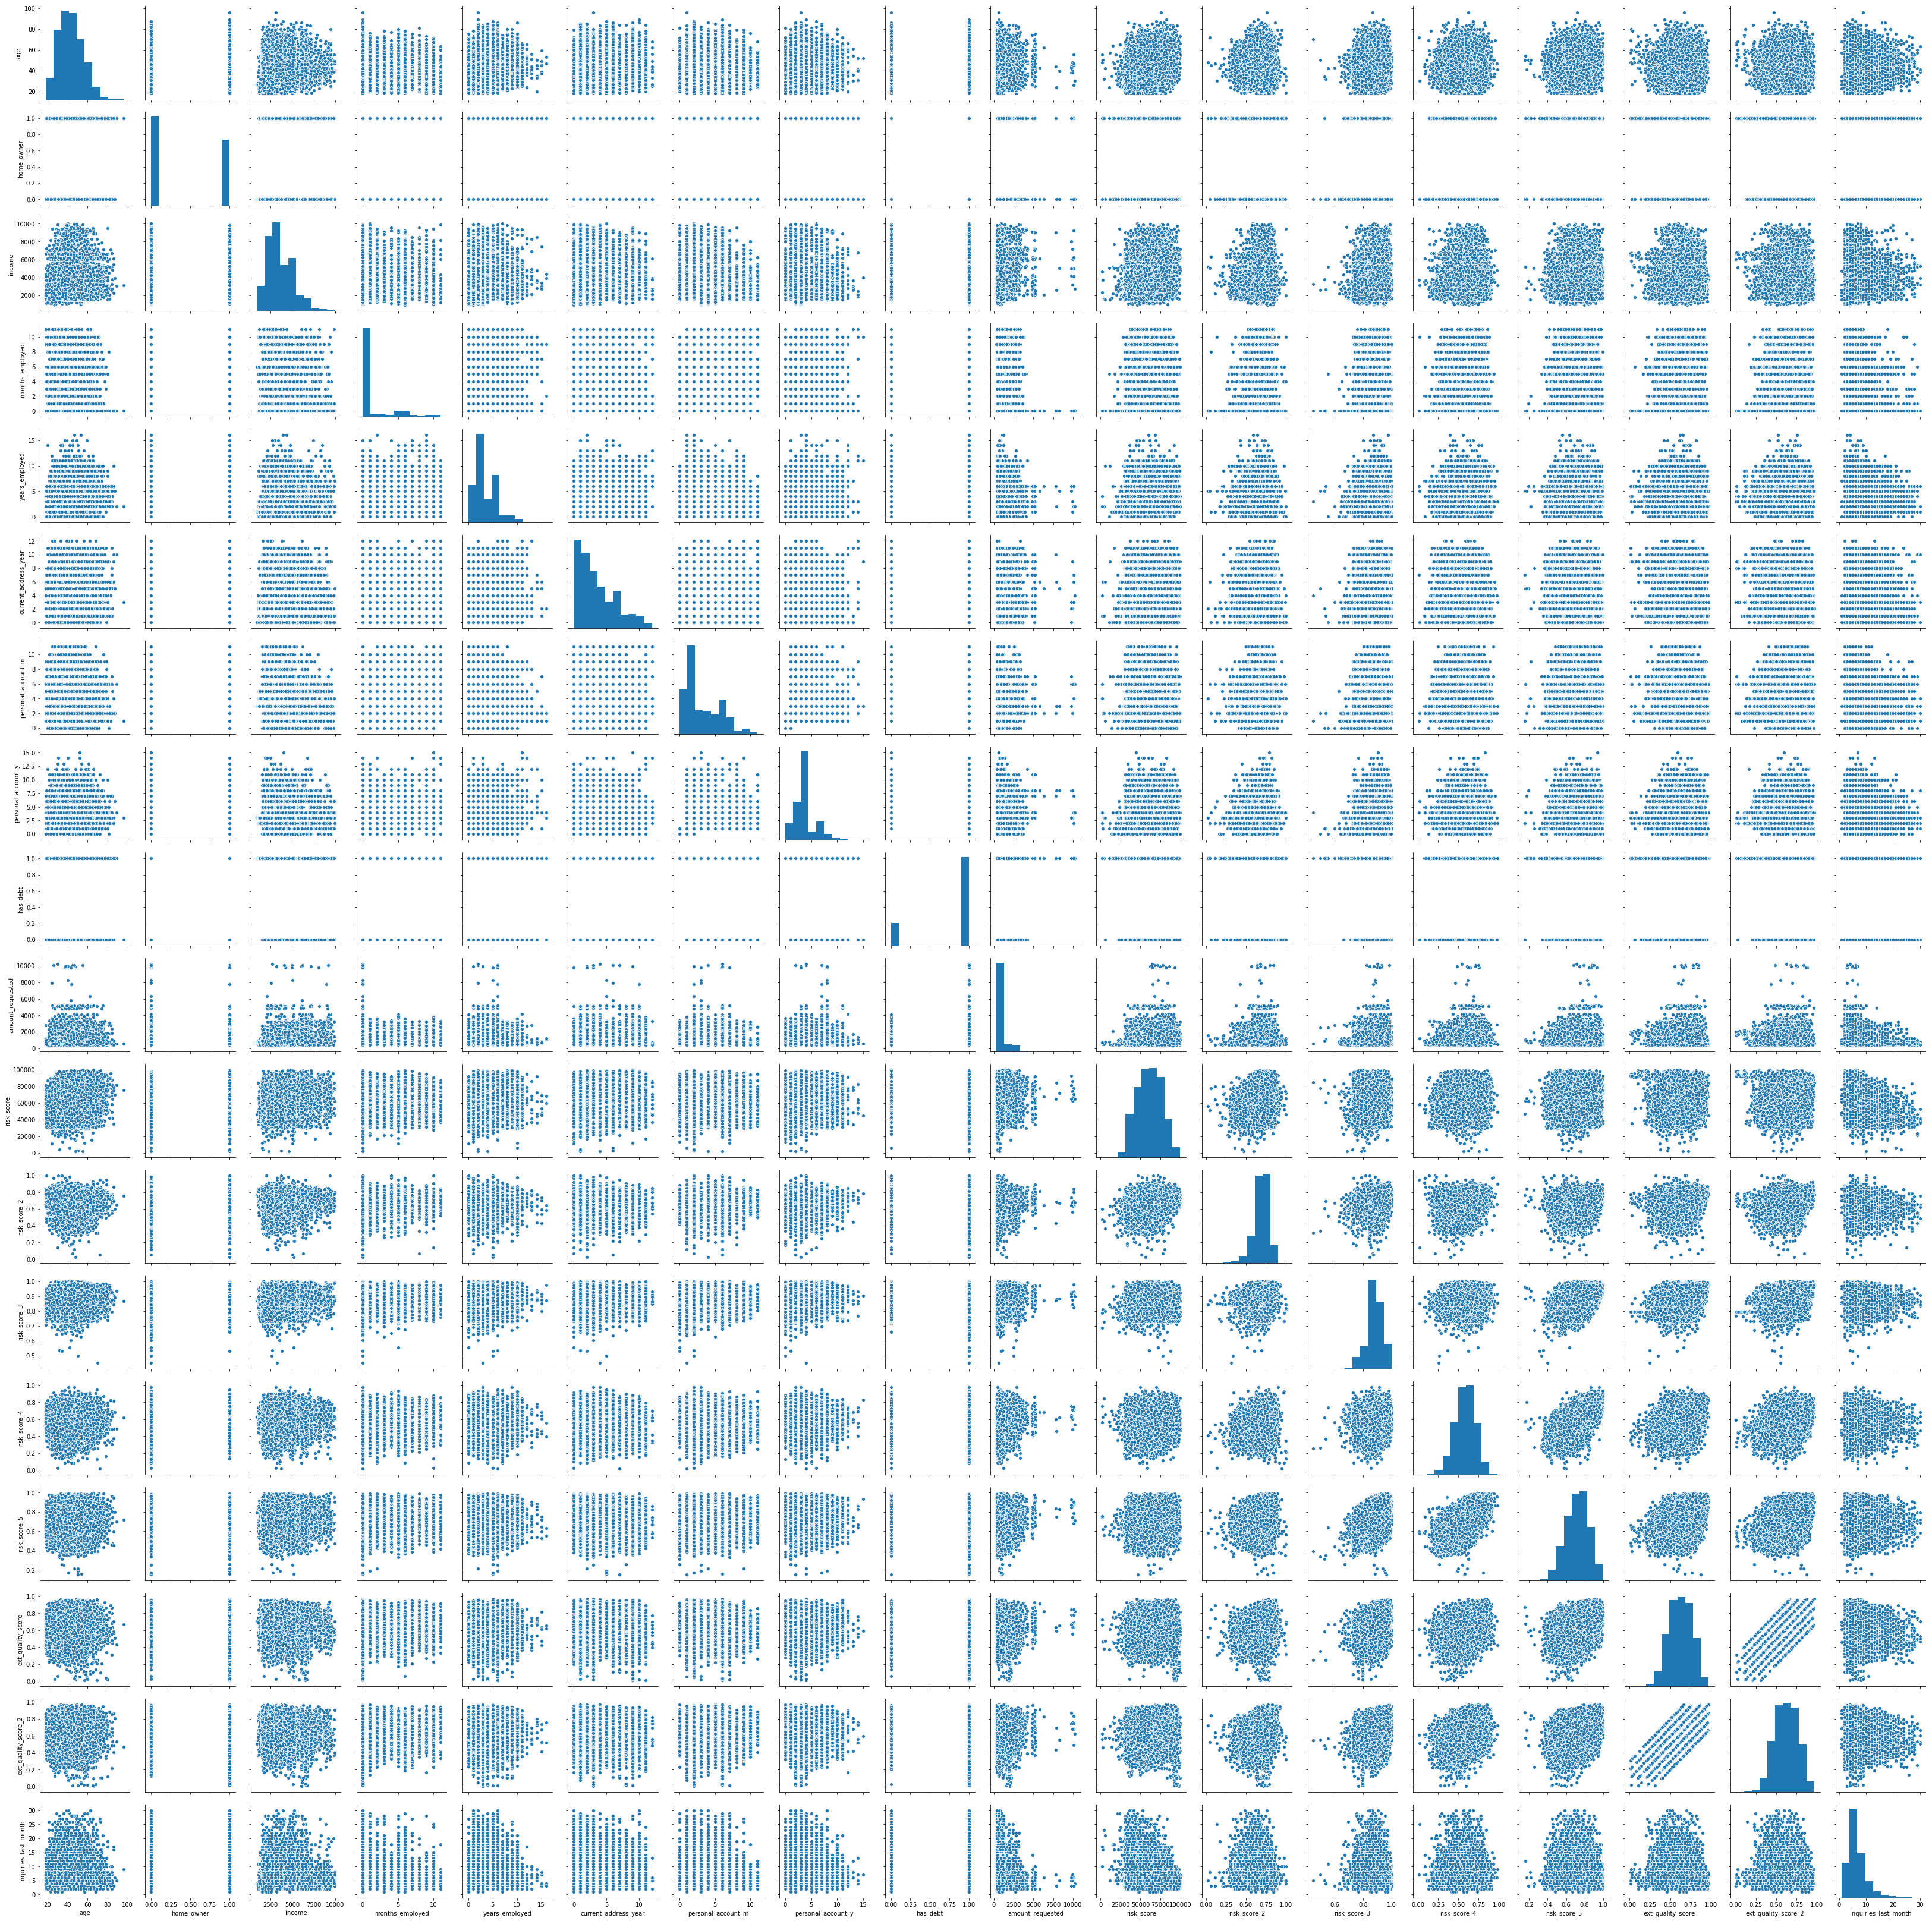

In [19]:
sns.pairplot(data1)

In [12]:
## We need to get rid of months_employed as that is not correctly representing the data and is faulty
## Coorelation plot

In [13]:
## We need to join month and year data

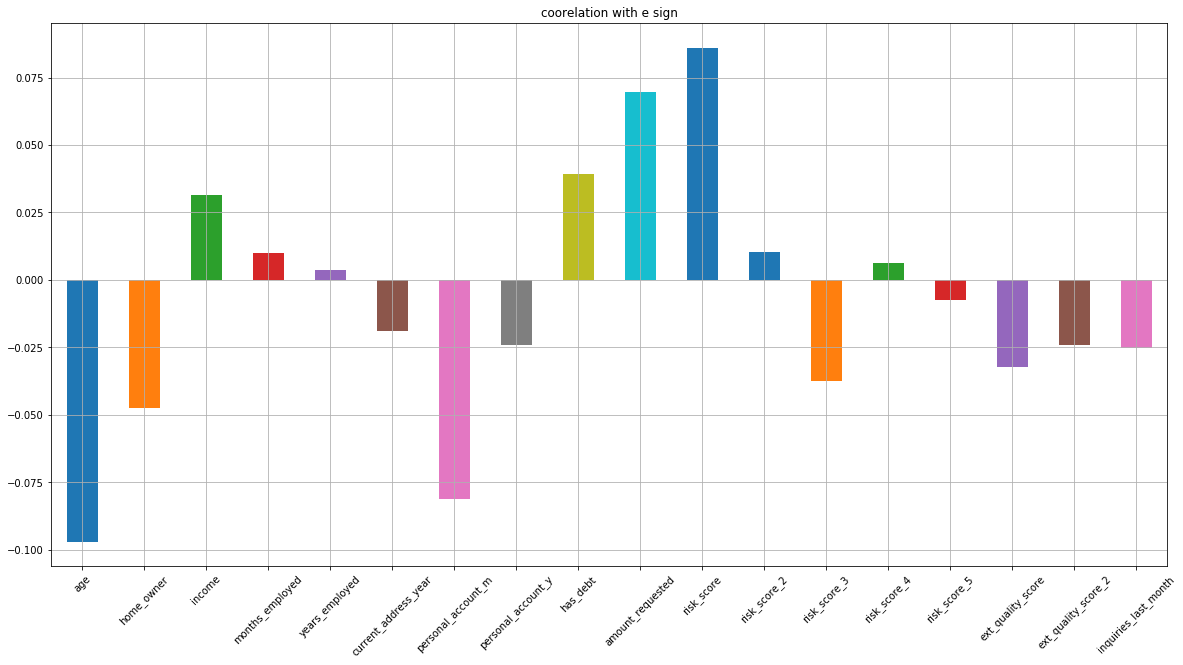

In [14]:
data1.corrwith(data.e_signed).plot.bar(title="coorelation with e sign",figsize=(20,10),rot=45,grid=True)

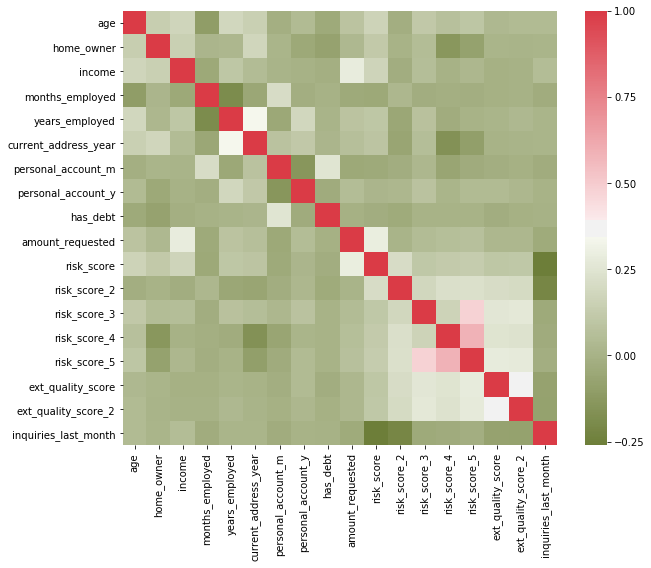

In [18]:
#Correlation Matrix
f, ax = plt.subplots(figsize=(10, 8))
corr = data1.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(100, 10, as_cmap=True),
            square=True, ax=ax)

In [19]:
## more income- more amount requested

In [20]:
## Preprocessing and cleaning

In [21]:
data=data.drop(columns=['months_employed'])

In [22]:
data['personal_account_months']=data.personal_account_m+data.personal_account_y*12

In [23]:
data=data.drop(columns=['personal_account_m','personal_account_y'])

In [24]:
data=pd.get_dummies(data)

In [25]:
data=data.drop(columns=['pay_schedule_semi-monthly'])

In [26]:
response=data['e_signed']
users=data['entry_id']
data=data.drop(columns=["e_signed","entry_id"])

In [27]:
## Split the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data,response,test_size=0.2,random_state=0)

In [28]:
## Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train_scaled=pd.DataFrame(sc_X.fit_transform(X_train))
X_test_scaled=pd.DataFrame(sc_X.transform(X_test))
X_train_scaled.columns=X_train.columns.values
X_test_scaled.columns=X_test.columns.values
X_train_scaled.index=X_train.index.values
X_test_scaled.index=X_test.index.values

X_train=X_train_scaled
X_test=X_test_scaled

C:\Users\Mr.Khiladi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Mr.Khiladi\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Mr.Khiladi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """


In [29]:
## Model Building
## Compare Models


In [30]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, penalty = 'l1')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Linear Regression (Lasso)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])



C:\Users\Mr.Khiladi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [31]:
## SVM (Linear)
from sklearn.svm import SVC
classifier = SVC(random_state = 0, kernel = 'linear')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['SVM (Linear)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)


In [32]:
## SVM (rbf)
from sklearn.svm import SVC
classifier = SVC(random_state = 0, kernel = 'rbf')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['SVM (RBF)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)



In [33]:
## Random Forests 
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 0, n_estimators = 100,
                                    criterion = 'entropy')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest (n=100)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)


In [34]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X= X_train, y = y_train,
                             cv = 10)
print("Random Forest Classifier Accuracy: %0.2f (+/- %0.2f)"  % (accuracies.mean(), accuracies.std() * 2))



Random Forest Classifier Accuracy: 0.63 (+/- 0.03)


In [36]:
# Applying Grid Search
import time
# Round 1: Entropy
parameters = {"max_depth": [3, None],
              "max_features": [1, 5, 10],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10],
              "bootstrap": [True, False],
              "criterion": ["entropy"]}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = classifier, # Make sure classifier points to the RF model
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)

t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters

Took 1963.47 seconds


(0.6356275303643725,
 {'bootstrap': True,
  'criterion': 'entropy',
  'max_depth': None,
  'max_features': 5,
  'min_samples_leaf': 1,
  'min_samples_split': 10})

In [37]:
# Round 2: Entropy
parameters = {"max_depth": [None],
              "max_features": [3, 5, 7],
              'min_samples_split': [8, 10, 12],
              'min_samples_leaf': [1, 2, 3],
              "bootstrap": [True],
              "criterion": ["entropy"]}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = classifier, # Make sure classifier points to the RF model
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)

t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters


Took 473.97 seconds


(0.6356275303643725,
 {'bootstrap': True,
  'criterion': 'entropy',
  'max_depth': None,
  'max_features': 5,
  'min_samples_leaf': 1,
  'min_samples_split': 10})

In [38]:
# Predicting Test Set
y_pred = grid_search.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest (n=100, GSx2 + Entropy)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)


In [39]:
# Round 1: Gini
parameters = {"max_depth": [3, None],
              "max_features": [1, 5, 10],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10],
              "bootstrap": [True, False],
              "criterion": ["gini"]}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = classifier, # Make sure classifier points to the RF model
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)

t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters


Took 917.61 seconds


(0.6363953650705012,
 {'bootstrap': True,
  'criterion': 'gini',
  'max_depth': None,
  'max_features': 10,
  'min_samples_leaf': 10,
  'min_samples_split': 2})

In [40]:
# Round 2: Gini
parameters = {"max_depth": [None],
              "max_features": [8, 10, 12],
              'min_samples_split': [2, 3, 4],
              'min_samples_leaf': [8, 10, 12],
              "bootstrap": [True],
              "criterion": ["gini"]}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = classifier, # Make sure classifier points to the RF model
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)

t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters



Took 421.76 seconds


(0.6386988691888873,
 {'bootstrap': True,
  'criterion': 'gini',
  'max_depth': None,
  'max_features': 12,
  'min_samples_leaf': 12,
  'min_samples_split': 2})

In [41]:
# Predicting Test Set
y_pred = grid_search.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest (n=100, GSx2 + Gini)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)


Test Data Accuracy: 0.6354


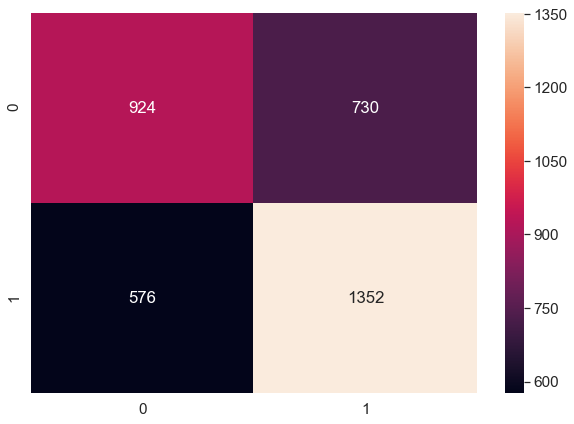

In [42]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))




In [43]:
#### End of Model ####


# Formatting Final Results

final_results = pd.concat([y_test, users], axis = 1).dropna()
final_results['predictions'] = y_pred
final_results = final_results[['entry_id', 'e_signed', 'predictions']]



In [44]:
final_results

entry_id  e_signed  predictions
8       6493191       1.0            0
9       8908605       1.0            0
12      6889184       1.0            1
16      9375601       0.0            1
18      8515555       1.0            1
31      2881357       0.0            0
33      7048193       1.0            1
37      5815308       1.0            1
44      8700190       1.0            1
45      8232654       0.0            1
47      6017637       0.0            1
48      9071675       0.0            1
51      2718414       0.0            0
60      1213384       1.0            1
65      9217393       0.0            1
69      1401385       0.0            0
74      3385813       1.0            1
88      3337988       1.0            0
94      5646177       1.0            0
103     6428253       1.0            0
119     8739167       0.0            1
122     9260893       0.0            0
124     6989789       1.0            0
127     5032836       0.0            0
129     5770277       1.0            0
134     9129594       1.0            0
142     4488789       1.0            0
146     3265474       1.0            0
150     4867078       1.0            1
154     5700559       1.0            1
...         ...       ...          ...
17779   2853843       0.0            1
17781   9800690       1.0            1
17796   8721355       0.0            0
17805   3386085       1.0            1
17811   6775612       0.0            1
17813   4985718       1.0            0
17814   2864796       0.0            1
17815   5737298       1.0            1
17820   4274110       1.0            1
17831   6093659       0.0            1
17835   7083364       1.0            1
17846   2040701       0.0            0
17847   7100904       1.0            1
17850   5038970       1.0            1
17854   8092654       1.0            1
17857   7045673       1.0            1
17864   7997931       0.0            1
17865   5946920       0.0            1
17866   3275691       1.0            1
17867   8990324       1.0            1
17871   2247736       1.0            0
17875   4736767       1.0            1
17876   3749453       0.0            0
17877   9192574       0.0            0
17880   3620673       1.0            0
17881   5028251       1.0            1
17888   8958068       0.0            0
17890   3605941       0.0            1
17901   1807355       0.0            1
17907   1498559       1.0            1

[3582 rows x 3 columns]